In [1]:
import numpy as np
allid = np.load("D:/Internet Explorer/downloads/ID_20231111.npy")
signalid=[ii for ii in allid if ii.split("_")[-1]=='EV']
print('Length of signalid is',len(signalid))

Length of signalid is 312231


In [18]:

import h5py
import numpy as np
f = h5py.File("D:/Google/Downloads/TXED_20231111_modified.h5", 'r')
eventid=np.load("D:/Internet Explorer/downloads/ID_20231111.npy")
idx=eventid[0:200]
print(len(idx))
dataset = f.get(idx[0])
data = np.array(dataset['data'])
print(data.shape)
print('TXED attributes are:',dataset.attrs.keys())

200
(20000, 3)
TXED attributes are: <KeysViewHDF5 ['causal', 'coda_end_sample', 'ev_depth', 'ev_latitude', 'ev_longitude', 'magnitude', 'origin_time', 'p_arrival_sample', 'p_arrival_time', 'p_uncertainty', 'polarity', 's_arrival_sample', 's_arrival_time', 's_uncertainty', 'snr_db', 'sta_elevation', 'sta_latitude', 'sta_longitude', 'station', 'trace_category']>


['texnet2023qnms_CV01_EV' 'texnet2023qnms_SA04_EV'
 'texnet2023qnms_SA06_EV' 'texnet2023qnms_SA07_EV'
 'texnet2023qnms_SA09_EV']
Plotting: 1/5


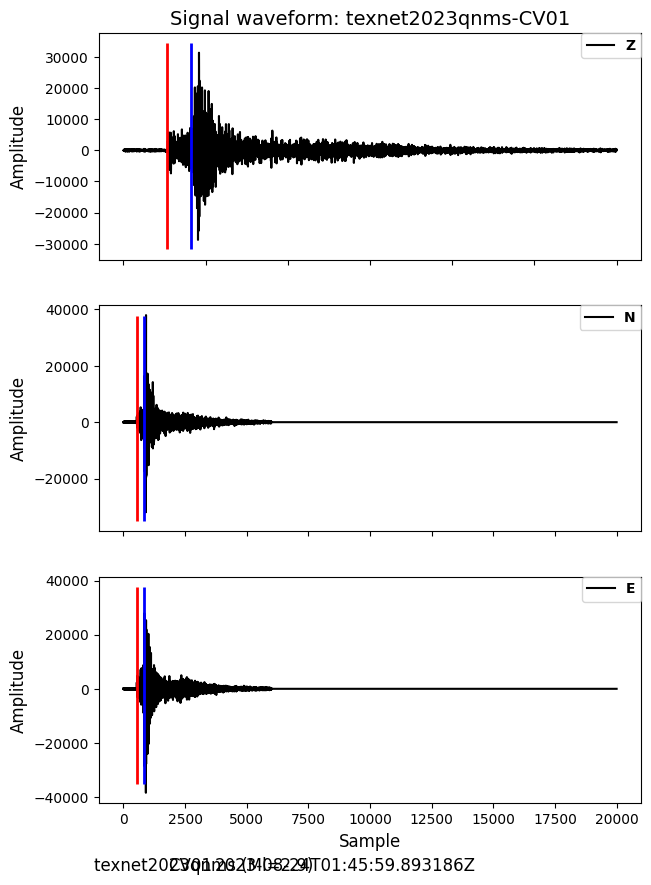

Plotting: 2/5


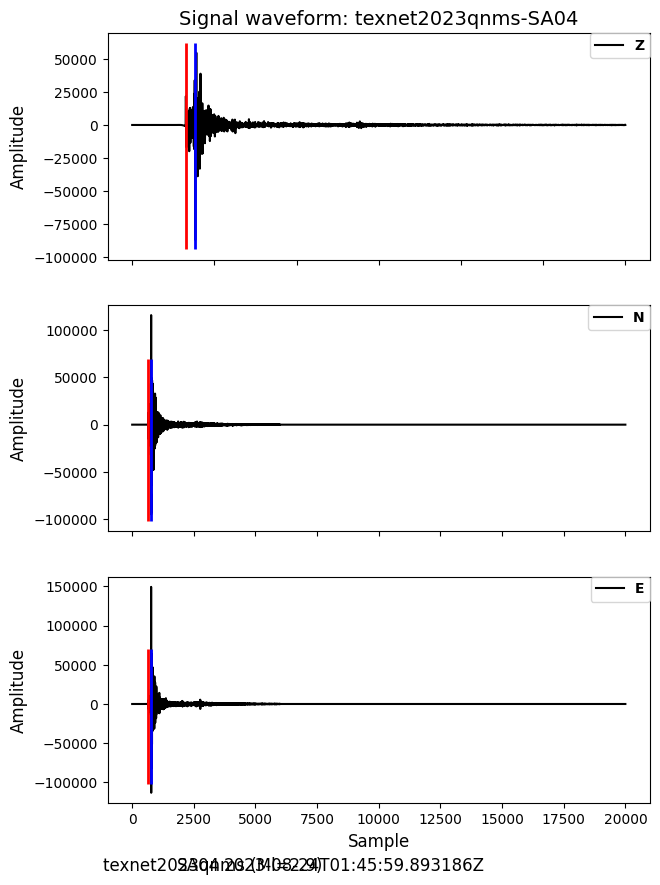

Plotting: 3/5


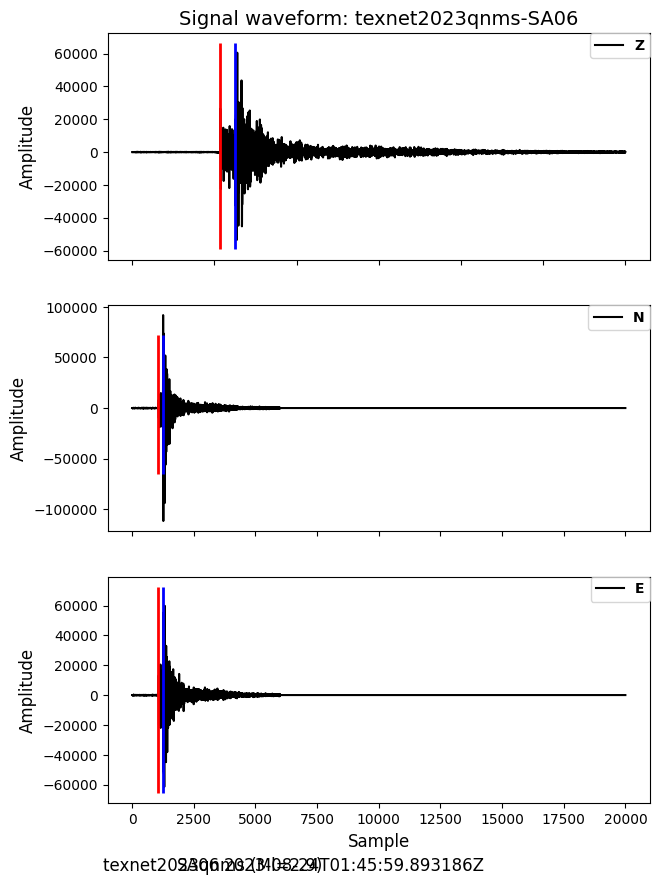

Plotting: 4/5


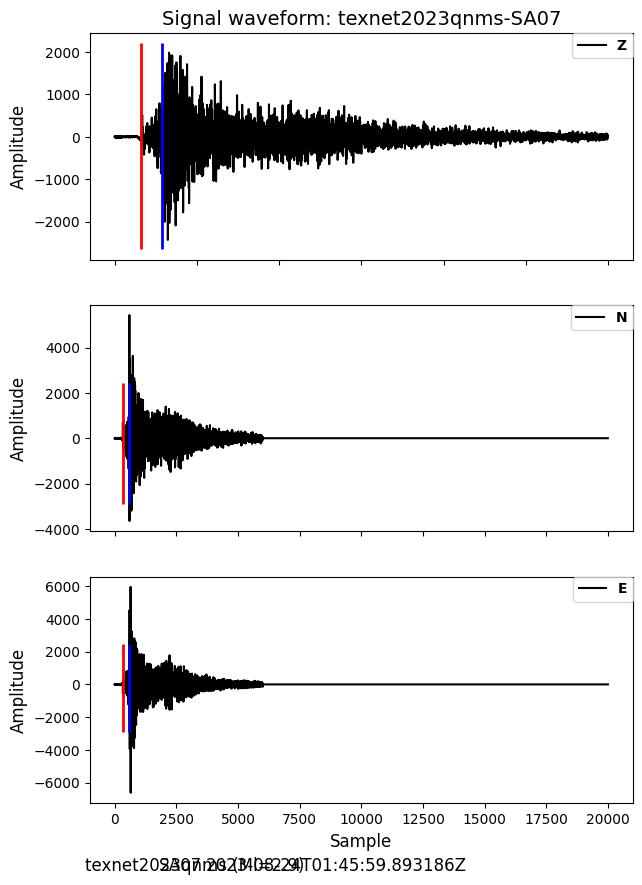

Plotting: 5/5


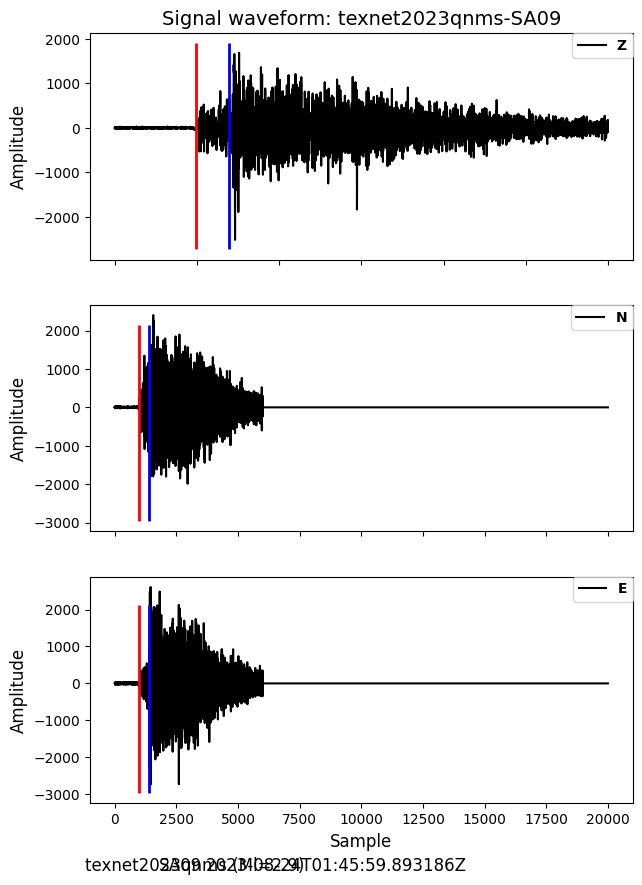

In [14]:
import h5py,os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,10)

if os.path.isdir('./waveforms') == False:  
	os.makedirs('./waveforms',exist_ok=True)

h5fname="D:/Google/Downloads/TXED_20231111_modified.h5"
npyfname="D:/Internet Explorer/downloads/ID_20231111.npy"

#open the h5file
f = h5py.File(h5fname, 'r')
eventid=np.load(npyfname)

#specificy a number of waveforms to plot
no=5
idxs=eventid[0:no]
print(idxs)

#or specify an arbitrary TexNet eventID
# idxs=[ii for ii in eventid if ii.split('_')[0]=='texnet2023qnms']
# idxs=[ii for ii in eventid if ii.split('_')[0]=='texnet2022wmmd']
#idxs=[ii for ii in eventid if ii.split('_')[0]=='texnet2023ncwh']
#print(idxs)

#loop over IDs and plot
id=0
for idx in idxs:
	id=id+1
	print('Plotting: %d/%d'%(id,len(idxs)))
	
	dataset = f.get(idx)
	data = np.array(dataset['data'])
	spt = int(dataset.attrs['p_arrival_sample']);
	sst = int(dataset.attrs['s_arrival_sample']);
	coda_end = int(dataset.attrs['coda_end_sample']);
	snr = dataset.attrs['snr_db'];
	t=dataset.attrs['origin_time']
	mag=dataset.attrs['magnitude']
	
	fig=plt.figure()
	ax1 = fig.add_subplot(311)
	plt.plot(data[:6000,0], 'k',label='Z')
	ymin,yma = ax1.get_ylim()
	plt.vlines(spt,ymin,yma,color='r',linewidth=2)
	plt.vlines(sst,ymin,yma,color='b',linewidth=2)
	legend_properties = {'weight':'bold'}
	ymin, ymax = ax1.get_ylim()
	plt.legend(loc = 'upper right', borderaxespad=0., prop=legend_properties)
	plt.ylabel('Amplitude', fontsize=12) 
	ax1.set_xticklabels([])
	ax = fig.add_subplot(312) 
	plt.plot(data[:,1], 'k',label='N')
	ymin,yma = ax1.get_ylim()
	plt.vlines(spt,ymin,yma,color='r',linewidth=2)
	plt.vlines(sst,ymin,yma,color='b',linewidth=2)
	legend_properties = {'weight':'bold'}
	ymin, ymax = ax.get_ylim()
	plt.legend(loc = 'upper right', borderaxespad=0., prop=legend_properties)
	plt.ylabel('Amplitude', fontsize=12) 
	ax.set_xticklabels([])
	ax = fig.add_subplot(313) 
	plt.plot(data[:,2], 'k',label='E')
	ymin,yma = ax1.get_ylim()
	plt.vlines(spt,ymin,yma,color='r',linewidth=2)
	plt.vlines(sst,ymin,yma,color='b',linewidth=2)
	legend_properties = {'weight':'bold'}
	ymin, ymax = ax.get_ylim()
	plt.legend(loc = 'upper right', borderaxespad=0., prop=legend_properties)
	plt.ylabel('Amplitude', fontsize=12) 
	plt.xlabel('Sample', fontsize=12) 

	eid=idx.split("_")[0]
	stname=idx.split("_")[1]
	sttime=t
	plt.text(-1200,(ymin-(ymax-ymin)*0.3),eid+' (Ml=%.2g)'%mag,fontsize=12,color='k')
	plt.text(1800,(ymin-(ymax-ymin)*0.3),stname,fontsize=12,color='k')
	plt.text(3700,(ymin-(ymax-ymin)*0.3),sttime,fontsize=12,color='k')
	ax1.set_title('Signal waveform: %s-%s'%(eid,stname), fontsize=14)
	plt.savefig(fname='./waveforms/signal-%s-%s'%(eid,stname)+'.png', format="png")
	plt.show()
	plt.close() 

f.close()

In [12]:
import h5py
import numpy as np

# 定义输入和输出文件名
input_filename = "D:/Google/Downloads/TXED_20231111.h5"
output_filename = "D:/Google/Downloads/TXED_20231111_modified_example100.h5"
ids=np.load("D:/Internet Explorer/downloads/ID_20231111.npy")
# 指定要处理的数据集名称
ev_names = [name for name in ids if name.endswith("EV")] 

# 打开输入文件
with h5py.File(input_filename, "r") as input_file:
    #print(input_file.keys())
    # 创建一个新的输出文件
    with h5py.File(output_filename, "w") as output_file:
        # 遍历指定的前100个数据集
        for dataset_name in ev_names[:100]:
            if dataset_name in input_file:
                # 获取当前数据集
                dataset = input_file[dataset_name]
                data = np.array(dataset['data'])  # 读取原始数据
                #print(data.shape)

                # 检查原始数据是否符合预期的形状 (6000, 3)
                if data.shape == (6000, 3):
                    # 创建一个新的 (20000, 3) 的矩阵，前后填充 7000 行 0
                    padded_data = np.zeros((20000, 3), dtype=data.dtype)
                    padded_data[:6000, :] = data  # 将原数据放入中间

                    # 在输出文件中创建相应的数据集，并写入填充后的数据
                    grp = output_file.create_group(dataset_name)
                    grp.create_dataset('data', data=padded_data)

                    # 如果原数据集中还有其他属性，复制它们
                    for attr_name, attr_value in dataset.attrs.items():
                        grp.attrs[attr_name] = attr_value
                else:
                    print(f"Warning: Dataset {dataset_name} has unexpected shape {data.shape}, skipping.")
            else:
                print(f"Dataset {dataset_name} not found in the input file, skipping.")

In [10]:
import h5py
import numpy as np

# 定义输入和输出文件名
input_filename = "D:/Google/Downloads/TXED_20231111.h5"
output_filename = "D:/Google/Downloads/TXED_20231111_modified_example.h5"
ids=np.load("D:/Internet Explorer/downloads/ID_20231111.npy")
# 指定要处理的数据集名称
ev_names = [name for name in ids if name.endswith("EV")] 

# 打开输入文件
with h5py.File(input_filename, "r") as input_file:
    #print(input_file.keys())
    # 创建一个新的输出文件
    with h5py.File(output_filename, "w") as output_file:
        # 遍历指定的前五个数据集
        for dataset_name in ev_names:
            if dataset_name in input_file:
                # 获取当前数据集
                dataset = input_file[dataset_name]
                data = np.array(dataset['data'])  # 读取原始数据
                #print(data.shape)

                # 检查原始数据是否符合预期的形状 (6000, 3)
                if data.shape == (6000, 3):
                    # 创建一个新的 (20000, 3) 的矩阵，前后填充 7000 行 0
                    padded_data = np.zeros((20000, 3), dtype=data.dtype)
                    padded_data[:6000, :] = data  # 将原数据放入中间

                    # 在输出文件中创建相应的数据集，并写入填充后的数据
                    grp = output_file.create_group(dataset_name)
                    grp.create_dataset('data', data=padded_data)

                    # 如果原数据集中还有其他属性，复制它们
                    for attr_name, attr_value in dataset.attrs.items():
                        grp.attrs[attr_name] = attr_value
                else:
                    print(f"Warning: Dataset {dataset_name} has unexpected shape {data.shape}, skipping.")
            else:
                print(f"Dataset {dataset_name} not found in the input file, skipping.")


KeyboardInterrupt: 